# Convolutional Neural Network (CNN) in PyTorch

This neural network will be trained on the Mnist dataset using the CNN architecture. More info about CNN can be found [here](https://medium.com/@draj0718/convolutional-neural-networks-cnn-architectures-explained-716fb197b243). 

**We start by importing the key libraries**

In [ ]:
# importing the key libraries
import torch
import cv2 as cv
import numpy as np
from PIL import Image
from torch import nn,optim
from torchvision import datasets,transforms
from torchvision.transforms import v2
from torch.utils.data import dataloader
import matplotlib.pyplot as plt
from tqdm import tqdm

### Downloading the Mnist Dataset

We will use the **torchvision** module to load the Mnist training and testing dataset.

In [ ]:
# setting the device to cuda to use the GPU if available
DEVICE = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# we download the dataset and transform it to a tensor data type
my_transform = transforms.Compose([transforms.ToTensor()])

training_set = datasets.MNIST(root="data",train=True,transform=my_transform,download=True)
testing_set = datasets.MNIST(root="data",train=False,transform=my_transform,download=True)

### Constructing our CNN class

We will initialize all the layers using the **nn** module in PyTorch. We will also create a method for training and testing our network.

In [ ]:
# constructing our CNN class
class PyTeen(nn.Module):
  def __init__(self):
    super().__init__()
    self.layers = nn.Sequential(    # inititalizing the layers of our CNN model
        nn.Conv2d(1,6,5,padding=2),
        nn.ReLU(),
        nn.MaxPool2d(2,stride=2),

        nn.Conv2d(6,16,5,padding=0),
        nn.ReLU(),
        nn.MaxPool2d(2,stride=2),

        nn.Flatten(),
        nn.Linear(400,120),
        nn.Linear(120,84),
        nn.Linear(84,10),

    )
    self.loss = nn.CrossEntropyLoss()
    self.optimizer = optim.Adam(self.parameters())

  def forward(self,input):
    return(self.layers(input))

  def predict(self,input):
    with torch.no_grad():
      pred = self.forward(input)
      return(torch.argmax(pred,axis=-1))

  def train(self,input,label):
    self.optimizer.zero_grad()
    pred = self.forward(input)
    loss = self.loss(pred,label)
    loss.backward()
    self.optimizer.step()
    return(loss.item())


100%|██████████| 9912422/9912422 [00:00<00:00, 141245834.02it/s]


Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw



100%|██████████| 28881/28881 [00:00<00:00, 28529367.36it/s]


Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 44474041.80it/s]


Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 9496774.06it/s]


Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw



### Training the network

We will use the train method defined above to train the network. We will also increase the batch size during training which have been proven to improve accuracy and training speed. 

More information can be found in the paper: [Don’t decay the learning rate increase the batch size](https://arxiv.org/pdf/1711.00489.pdf)

In [ ]:
#initializing our network
network = PyTeen()
network.to(torch.device(DEVICE))

# training loop
EPOCHS = 30
for i in range(EPOCHS):
  total_loss = 0
  # changing batch size during training
  if i < 15:
    BATCH_SIZE = 16
  elif i >=15 and i <20:
    BATCH_SIZE = 32
  else:
    BATCH_SIZE = 128

  training_loader = dataloader.DataLoader(training_set,batch_size=BATCH_SIZE, shuffle=True)
  for input,label in tqdm(training_loader):
    input = input.to(torch.device(DEVICE))
    label = label.to(torch.device(DEVICE))
    loss = network.train(input,label)
    total_loss += loss
  print("EPOCH:", i+1,": ",total_loss)


100%|██████████| 3750/3750 [01:09<00:00, 54.18it/s]


EPOCH: 1 :  1656.5260076865088


100%|██████████| 3750/3750 [01:05<00:00, 57.45it/s]


EPOCH: 2 :  859.9851211777423


100%|██████████| 3750/3750 [01:05<00:00, 56.98it/s]


EPOCH: 3 :  752.7621782300994


100%|██████████| 3750/3750 [01:06<00:00, 56.02it/s]


EPOCH: 4 :  690.1360576909501


100%|██████████| 3750/3750 [01:07<00:00, 55.57it/s]


EPOCH: 5 :  661.1853302748641


100%|██████████| 3750/3750 [01:07<00:00, 55.53it/s]


EPOCH: 6 :  626.3621089668013


100%|██████████| 3750/3750 [01:08<00:00, 54.82it/s]


EPOCH: 7 :  610.7814251285745


100%|██████████| 3750/3750 [01:08<00:00, 54.71it/s]


EPOCH: 8 :  595.1937870879192


100%|██████████| 3750/3750 [01:09<00:00, 53.58it/s]


EPOCH: 9 :  587.08782794117


100%|██████████| 3750/3750 [01:08<00:00, 54.60it/s]


EPOCH: 10 :  574.7119326794636


100%|██████████| 3750/3750 [01:07<00:00, 55.40it/s]


EPOCH: 11 :  550.999776529381


100%|██████████| 3750/3750 [01:09<00:00, 53.99it/s]


EPOCH: 12 :  546.6498277119827


100%|██████████| 3750/3750 [01:09<00:00, 53.95it/s]


EPOCH: 13 :  538.414248032379


100%|██████████| 3750/3750 [01:10<00:00, 52.88it/s]


EPOCH: 14 :  546.385848196107


100%|██████████| 3750/3750 [01:10<00:00, 53.50it/s]


EPOCH: 15 :  536.0006253729807


100%|██████████| 1875/1875 [01:00<00:00, 31.05it/s]


EPOCH: 16 :  240.26686949143186


100%|██████████| 1875/1875 [01:06<00:00, 28.06it/s]


EPOCH: 17 :  242.10855500912294


100%|██████████| 1875/1875 [01:01<00:00, 30.57it/s]


EPOCH: 18 :  237.47877365374006


100%|██████████| 1875/1875 [01:01<00:00, 30.31it/s]


EPOCH: 19 :  239.77386128739454


100%|██████████| 1875/1875 [01:01<00:00, 30.63it/s]


EPOCH: 20 :  240.2110546482727


100%|██████████| 469/469 [00:55<00:00,  8.46it/s]


EPOCH: 21 :  52.891840908676386


100%|██████████| 469/469 [00:54<00:00,  8.55it/s]


EPOCH: 22 :  52.74673435278237


100%|██████████| 469/469 [00:54<00:00,  8.56it/s]


EPOCH: 23 :  50.571865409612656


100%|██████████| 469/469 [00:56<00:00,  8.29it/s]


EPOCH: 24 :  51.49283261690289


100%|██████████| 469/469 [00:55<00:00,  8.45it/s]


EPOCH: 25 :  51.59818361699581


100%|██████████| 469/469 [00:55<00:00,  8.49it/s]


EPOCH: 26 :  53.339092034846544


100%|██████████| 469/469 [00:55<00:00,  8.47it/s]


EPOCH: 27 :  51.576456340029836


100%|██████████| 469/469 [00:55<00:00,  8.48it/s]


EPOCH: 28 :  51.32389880158007


100%|██████████| 469/469 [00:55<00:00,  8.46it/s]


EPOCH: 29 :  51.32833299227059


100%|██████████| 469/469 [00:54<00:00,  8.55it/s]

EPOCH: 30 :  51.07730234414339


### Evaluating the network

In [ ]:
# setting up our training and testing data
BATCH_SIZE = 32
testing_loader = dataloader.DataLoader(testing_set,batch_size=BATCH_SIZE,shuffle=False)


# Evaluating our CNN model
correct_pred = 0

for input,label in tqdm(testing_loader):
  input = input.to(torch.device(DEVICE))
  label = label.to(torch.device(DEVICE))
  pred = network.predict(input)
  # finding accuracy of our network
  for i in range(len(pred)):
    if pred[i] == label[i]:
      correct_pred += 1

print('\\n',correct_pred/(len(testing_loader)*BATCH_SIZE))

We also may want to save the network if we get a good accuracy score. I obtained an accuracy score of 98.82% which was satisfactory. To improve the accuracy, we can look into implementing a better CNN architecture like ResNet.

In [ ]:
# saving our weights if we get a good accuracy
torch.save(network.state_dict(),"pyTeenConvotilt9882.pth")

### Creating our own numbers to test the network

- We can use MSPaint
- Save result as jpg (280 x 280)
- Using opencv-python library to load the image
- Display the image using plt.imshow()


tensor([1])


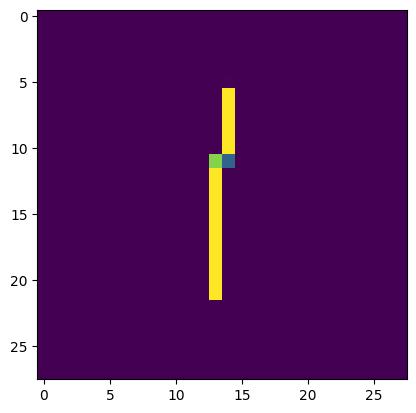

In [ ]:
# re-initializing our network
network = PyTeen()
network.to(torch.device(DEVICE))
network.load_state_dict(torch.load("/content/pyTeenConvo9882.pth"))

# img = cv.imread("canvas.jpg",cv.IMREAD_GRAYSCALE)

# scaling = cv.resize(img,(28,28))
# my_img_processed = cv.bitwise_not(scaling)
# print(type(my_img_processed))
# plt.imshow(my_img_processed)
# print(my_img_processed.shape, type(my_img_processed))

# cv.imwrite('new.jpg',my_img_processed)

new_img = Image.open("new.png")
plt.imshow(new_img)
my_img_transform = transforms.Compose([transforms.Resize((28,28)),transforms.ToTensor()])

input_img = my_transform(new_img).unsqueeze(0) # converting it to a batch

print(network.predict(input_img))
